In [ ]:
#import library & print atribut of the dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sn

def load_data():
  dataset = load_digits()
  feature = dataset['images']
  target = dataset['target']

  return feature, target

def preprocess_data(feature, target):
  feature = feature.reshape((len(feature), -1))
  feature = MinMaxScaler().fit_transform(feature)

  target = target.reshape(target.shape[0], -1)
  target = OneHotEncoder(sparse = False).fit_transform(target)
  return feature, target

In [ ]:
#initial layers, weight, & bias
layers = {
    'input': 64,
    'hidden': 15,
    'output': 10
}

weight = {
    'hidden': tf.Variable(tf.random.normal([layers['input'], layers['hidden']])),
    'output': tf.Variable(tf.random.normal([layers['hidden'], layers['output']]))
}

bias = {
    'hidden': tf.Variable(tf.random.normal([layers['hidden']])),
    'output': tf.Variable(tf.random.normal([layers['output']]))
}

In [ ]:
def activation(x):
  return tf.nn.sigmoid(x)

def foward_pass(feature):
  x1 = tf.matmul(feature, weight['hidden']) + bias['hidden']
  y1 = activation(x1)

  x2 = tf.matmul(y1, weight['output']) + bias['output']
  y2 = activation(x2)

  return y2

In [ ]:
feature_temp = tf.placeholder(tf.float32, [None, layers['input']])
target_temp = tf.placeholder(tf.float32, [None, layers['output']])

#learning_rate & epoch
Learning_rate = 0.5
epoch = 20000

output = foward_pass(feature_temp)
error = tf.reduce_mean(0.5 * (target_temp- output)**2)

#optimizer
train = tf.train.GradientDescentOptimizer(Learning_rate).minimize(error)

feature, target = load_data()
feature,target = preprocess_data(feature,target)

#split the data
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.3)

In [ ]:
arr1 = []
arr2 = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for i in range(epoch + 1):
    train_data = {
        feature_temp: feature_train,
        target_temp: target_train
    }
    sess.run(train, feed_dict=train_data)

    if i % 1000 == 0:
      Accuracy = tf.equal(tf.argmax(target_temp, axis=1), tf.argmax(output, axis=1))
      prediction = tf.argmax(output, axis = 1)
      result = tf.reduce_mean(tf.cast(Accuracy, tf.float32))
      
      test_data = {
          feature_temp: feature_test,
          target_temp: target_test
      }
      prediction = sess.run(prediction, feed_dict = test_data)
      
      acc1 = sess.run(result, feed_dict=train_data)
      acc2 = sess.run(result, feed_dict=test_data)
      arr1.append(acc1)
      arr2.append(acc2)

      print(f'Epoch: {i}, Accuracy: {acc2 * 100}%')

print(f'Final Accuracy: {acc2 * 100}%')

Epoch: 0, Accuracy: 9.81481447815895%
Epoch: 1000, Accuracy: 30.37036955356598%
Epoch: 2000, Accuracy: 40.00000059604645%
Epoch: 3000, Accuracy: 44.999998807907104%
Epoch: 4000, Accuracy: 47.40740656852722%
Epoch: 5000, Accuracy: 49.81481432914734%
Epoch: 6000, Accuracy: 54.62962985038757%
Epoch: 7000, Accuracy: 58.14814567565918%
Epoch: 8000, Accuracy: 61.666667461395264%
Epoch: 9000, Accuracy: 64.25926089286804%
Epoch: 10000, Accuracy: 68.88889074325562%
Epoch: 11000, Accuracy: 70.18518447875977%
Epoch: 12000, Accuracy: 72.22222089767456%
Epoch: 13000, Accuracy: 73.70370626449585%
Epoch: 14000, Accuracy: 75.0%
Epoch: 15000, Accuracy: 76.66666507720947%
Epoch: 16000, Accuracy: 78.88888716697693%
Epoch: 17000, Accuracy: 80.37037253379822%
Epoch: 18000, Accuracy: 82.03703761100769%
Epoch: 19000, Accuracy: 84.44444537162781%
Epoch: 20000, Accuracy: 85.74073910713196%
Final Accuracy: 85.74073910713196%


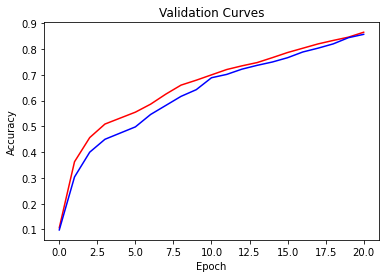

In [ ]:
#Validation Curves

plt.plot(arr1, 'red')
plt.plot(arr2, 'blue')
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
feature = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
target_test = target_test.dot(feature).astype(int)
target_train = target_train.dot(feature).astype(int)

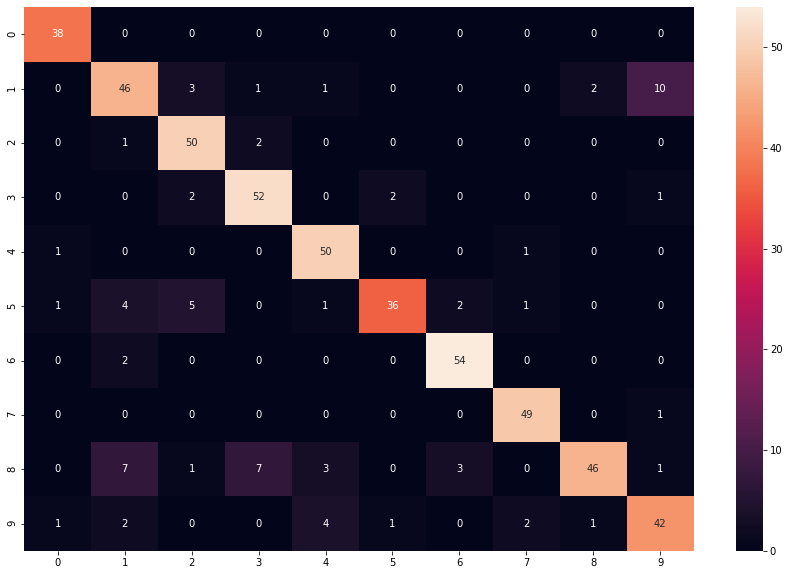

In [ ]:
# target_test = tf.argmax(target_test, axis=1)

Confusion_Matrix = metrics.confusion_matrix(target_test, prediction)
df_cm = pd.DataFrame(Confusion_Matrix, range(10), range(10))
plt.figure(figsize=(15,10))
sn.heatmap(df_cm, annot=True)
plt.show()